In [1]:
from numpy import loadtxt
from keras.models import load_model
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
# load model
model = load_model('model.cars_colours')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

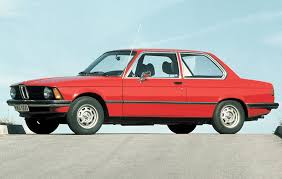

In [3]:
img5=Image.open("INPUT/fotocochesinternet/16.jpeg")
img5

In [ ]:
#labels=[["black"], ["white"], ["green"], ["red"]]

In [ ]:
#enc = OneHotEncoder()
#enc.fit(labels)  

In [ ]:
#enc.get_feature_names()

In [4]:
img5 = img5.resize((64,64))


In [5]:
img5=np.expand_dims(np.array(img5),0)

In [6]:
img5=tf.keras.utils.normalize(img5,axis=1) 


In [7]:
model.predict(img5)

array([[1.3917645e-07, 2.8879026e-06, 9.9998498e-01, 1.0087718e-06]],
      dtype=float32)

In [8]:
#pred= model.predict(np.array(img5))
pred= model.predict(img5)

In [9]:

enc = OneHotEncoder()
enc.fit(labels)  

NameError: name 'labels' is not defined

In [ ]:
c = enc.inverse_transform(pred)

prob = max(pred[0])

In [ ]:
res = c[0,0],prob
res


In [10]:
#se que se puede hacer esta funcion mas corta, con la de abajo lo he hecho, pero me sirve para verlo mas claro
def CCCP(path):
    pic=Image.open(path)
    pic=pic.resize((64,64))
    pic=np.expand_dims(np.array(pic),0)
    pic=tf.keras.utils.normalize(pic,axis=1) 
    pred= model.predict(pic)
    enc = OneHotEncoder()
    labels=[["black"],["green"], ["red"], ["white"]]
    enc.fit(labels)  
    c = enc.inverse_transform(pred)
    prob = max(pred[0])
    resp = c[0,0],prob
    return resp

In [11]:
CCCP("INPUT/fotocochesinternet/16.jpeg")

('red', 0.999985)

In [12]:
import random
def car_c (*resp):
    dic={'black':["the black sheep you are","my soul","Black Lives Matter", "Michael Jackson... I mean, the young Michael Jackson", "Back to Black by AC/DC"],
          'white':["the White Stripes", "the Pope", "Barry's surname", "the white russian I'll have this evening"],
          'red':["red,red wine", "Trotsky and Pablo Iglesias", "the Communism", "little red riding hood"],
          'green':["Hulk", "Green day", "the Green Lantern, the worst script ever", "Pere-grin"]
        }
    
    return f'The color of the car of the picture is {resp[0]}, like {random.choice(dic[resp[0]])}, with a probability of {round(resp[1]*100,2)}%.'
    

In [13]:
car_c(*CCCP("INPUT/fotocochesinternet/16.jpeg"))

'The color of the car of the picture is red, like red,red wine, with a probability of 100.0%.'